<a href="https://colab.research.google.com/github/KhoaKD59/MID-TERM---MINI-PROJECT/blob/main/Flowers_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Import các thư viện cần thiết, bao gồm: Keras, numpy, matplotlib, và os.
from keras.utils.np_utils         import to_categorical
from tensorflow.keras.optimizers  import RMSprop
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout
from keras.models                 import Sequential
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from keras.models                 import load_model
from keras.utils                  import np_utils

import matplotlib.pyplot as plt
import glob
import cv2
import numpy as np



In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from os import listdir
from numpy import asarray
folder = '/content/drive/MyDrive/AI_PROJECT/Flower/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('hoavantho'):
    output = 0
  if file.startswith('hoamattroi'):
    output = 1
  if file.startswith('hoathuocluoc'):
    output = 2
  if file.startswith('hoacuc'):
    output = 3
  
  
  photo = load_img(folder + file, target_size=(224,224))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI_PROJECT/Flower/5Flowers_photos.npy', photos)
save('/content/drive/MyDrive/AI_PROJECT/Flower/5Flowers_labels.npy', labels)
     

(41, 224, 224, 3) (41,)


In [30]:
import numpy as np

# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI_PROJECT/Flower/5Flowers_photos.npy')
labels = np.load('/content/drive/MyDrive/AI_PROJECT/Flower/5Flowers_labels.npy')
labels_one_hot = to_categorical(labels)

from sklearn.model_selection import train_test_split
x_trains, x_tests, y_trains, y_tests = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [31]:
# Tạo ra mạng CNN để train mô hình
"""Tạo model CNN bằng cách sử dụng lớp Conv2D để thêm các layer convolution, lớp MaxPooling2D để giảm chiều của ảnh,
 lớp Flatten để chuyển đổi dữ liệu ảnh thành một vector 1D, lớp Dense để thêm các layer fully connected, và lớp Dropout để tránh overfitting."""
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import ReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop

classes = 4  #4 lớp ẩn

model = Sequential()
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (224,224, 3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Sử dụng Dropout để tránh học vẹt
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 128)       1

In [32]:
# Sử dụng thuật toán tăng cường data
from keras.preprocessing.image import ImageDataGenerator
IDG = ImageDataGenerator(rotation_range=20, zoom_range=0.1,rescale=1./255,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,
brightness_range=[0.2,1.5], fill_mode="nearest")

'''Tham số rotation_range chỉ định phạm vi độ nghiêng cho các phép xoay ngẫu nhiên được áp dụng cho các hình ảnh trong quá trình huấn luyện.
 Tham số zoom_range chỉ định phạm vi các giá trị zoom được áp dụng ngẫu nhiên cho các hình ảnh.'''

'Tham số rotation_range chỉ định phạm vi độ nghiêng cho các phép xoay ngẫu nhiên được áp dụng cho các hình ảnh trong quá trình huấn luyện.\n Tham số zoom_range chỉ định phạm vi các giá trị zoom được áp dụng ngẫu nhiên cho các hình ảnh.'

In [33]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(IDG.flow(x_trains, y_trains, batch_size=32),
                               epochs = 50)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 1.3824 - accuracy: 0.2857
Epoch 2/50
1/1 [==============================] - 0s 417ms/step - loss: 1.9919 - accuracy: 0.2857
Epoch 3/50
1/1 [==============================] - 0s 403ms/step - loss: 1.4768 - accuracy: 0.2500
Epoch 4/50
1/1 [==============================] - 0s 402ms/step - loss: 1.3860 - accuracy: 0.2143
Epoch 5/50
1/1 [==============================] - 0s 417ms/step - loss: 1.3709 - accuracy: 0.3929
Epoch 6/50
1/1 [==============================] - 0s 402ms/step - loss: 1.3501 - accuracy: 0.3929
Epoch 7/50
1/1 [==============================] - 0s 399ms/step - loss: 1.2991 - accuracy: 0.4286
Epoch 8/50
1/1 [==============================] - 0s 431ms/step - loss: 1.1777 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 397ms/step - loss: 1.2119 - accuracy: 0.4286
Epoch 10/50
1/1 [==============================] - 0s 419ms/step - loss: 0.9365 - accuracy: 0.5714
Epoch 11/50
1/1 [===

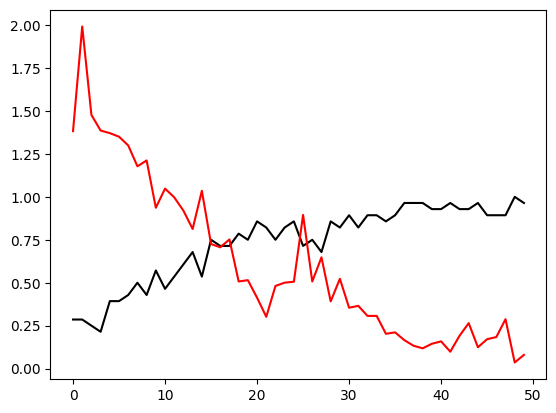

In [34]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'black', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()


In [36]:
train = model.fit(IDG.flow(x_trains, y_trains, batch_size=32),
                               epochs = 30)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
1/1 [==============================] - 1s 844ms/step - loss: 0.1596 - accuracy: 0.9286
Epoch 2/30
1/1 [==============================] - 1s 1s/step - loss: 0.1080 - accuracy: 0.9286
Epoch 3/30
1/1 [==============================] - 0s 408ms/step - loss: 0.3052 - accuracy: 0.9286
Epoch 4/30
1/1 [==============================] - 0s 421ms/step - loss: 0.1131 - accuracy: 0.9643
Epoch 5/30
1/1 [==============================] - 1s 633ms/step - loss: 0.2095 - accuracy: 0.9643
Epoch 6/30
1/1 [==============================] - 1s 613ms/step - loss: 0.0631 - accuracy: 0.9643
Epoch 7/30
1/1 [==============================] - 1s 595ms/step - loss: 0.1566 - accuracy: 0.8571
Epoch 8/30
1/1 [==============================] - 1s 532ms/step - loss: 0.2834 - accuracy: 0.8214
Epoch 9/30
1/1 [==============================] - 0s 412ms/step - loss: 0.1657 - accuracy: 0.9286
Epoch 10/30
1/1 [==============================] - 0s 398ms/step - loss: 0.3091 - accuracy: 0.9286
Epoch 11/30
1/1 [=====

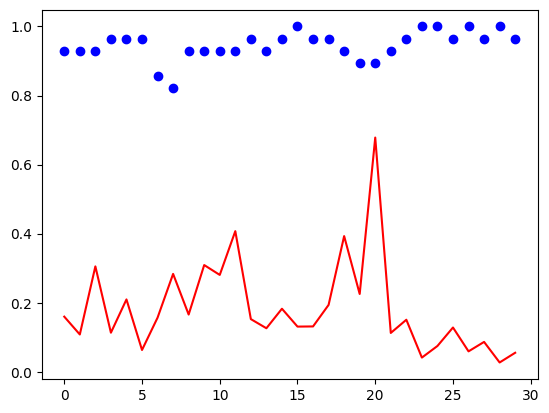

In [37]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [38]:
train = model.fit(IDG.flow(x_trains, y_trains, batch_size=32),
                               epochs = 10)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/10
1/1 [==============================] - 1s 673ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 432ms/step - loss: 0.1930 - accuracy: 0.9286
Epoch 3/10
1/1 [==============================] - 0s 411ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 445ms/step - loss: 0.0965 - accuracy: 0.9286
Epoch 5/10
1/1 [==============================] - 0s 412ms/step - loss: 0.1511 - accuracy: 0.9643
Epoch 6/10
1/1 [==============================] - 0s 400ms/step - loss: 0.0948 - accuracy: 0.9643
Epoch 7/10
1/1 [==============================] - 0s 415ms/step - loss: 0.1288 - accuracy: 0.9643
Epoch 8/10
1/1 [==============================] - 0s 402ms/step - loss: 0.0783 - accuracy: 0.9286
Epoch 9/10
1/1 [==============================] - 0s 403ms/step - loss: 0.0879 - accuracy: 0.9643
Epoch 10/10
1/1 [==============================] - 0s 44ms/step - loss: 1019.5556 - accuracy: 0.5385
Accurency: 0.5384

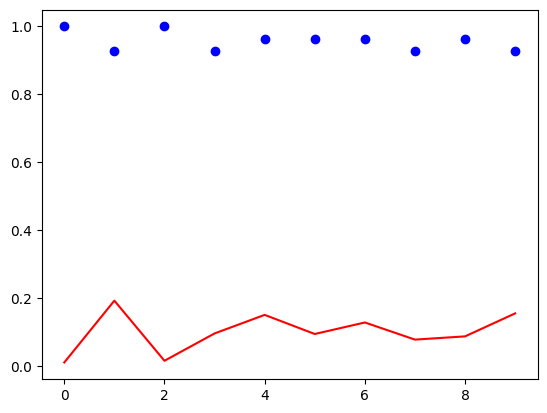

In [39]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [40]:
model.save('/content/drive/MyDrive/AI_PROJECT/Flower/Flower.h5')

In [41]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/AI_PROJECT/Flower/Flower.h5')

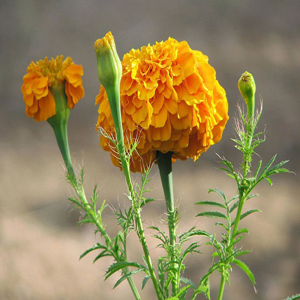

1/1 [==============================] - 0s 22ms/step
['hoavantho']


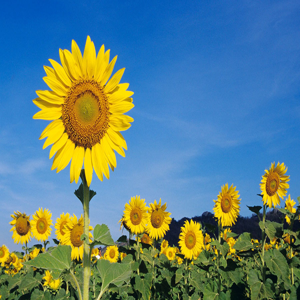

1/1 [==============================] - 0s 18ms/step
['hoacuc']


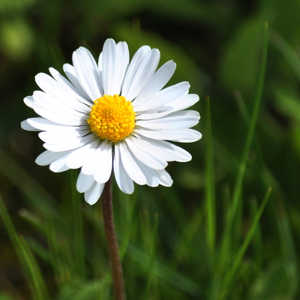

1/1 [==============================] - 0s 19ms/step
['hoacuc']


In [ ]:
from PIL import Image
import numpy as np
import os

#Tạo mảng để chứa label
label = np.array(['hoavantho', 'hoamattroi', 'hoathuocluoc', 'hoacuc'])


# Kích thước mới của ảnh
new_size = (300, 300)
predict_size = (224, 224)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/AI_PROJECT/Flower/testing data'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,224,224,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])